# Packages, Libraries, and Constants
- Different packages, Libraries

- Different constants and parameters

# Path to the datasets

1. Speech Intent Classification (SIC) Dataset
 - `emabega` - `ddyo` - `unknown` - `kkono`  - `yimirira` - `mu maaso` 

2. Datasets
- `Original train data` - `Test data`


In [1]:
from packages.utils import *

2024-10-12 17:53:56.579893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 17:53:56.607647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 17:53:56.616202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 17:53:56.635285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-12 17:53:58.105489: W tensorflow/compiler/tf2

## Directory Labels

In [2]:
from packages.data_processing import list_directory_contents


# Show the structure of the directory
train_commands = list_directory_contents(train_data_dir, 'Train')
test_commands = list_directory_contents(test_data_dir, 'Test')

Train commands labels: ['unknown' 'ddyo' 'emabega' 'yimirira' 'mumaaso' 'kkono']
Test commands labels: ['unknown' 'ddyo' 'emabega' 'yimirira' 'mumaaso' 'kkono']


# Dataset Pre-processing

## 1. Train and validation Datasets

- `Creating the Train and Validate Datasets`

In [3]:
from packages.data_processing import create_train_val_audio_dataset


# Spilt  and batch data into train and validation and extract Labels
train_ds, val_ds, label_names = create_train_val_audio_dataset(train_data_dir)
print(f'Labels: {label_names}')

Found 9985 files belonging to 6 classes.
Using 7988 files for training.
Using 1997 files for validation.
Audio Shape: (32, 16000)
Label Shape: (32,)
Labels: ['ddyo' 'emabega' 'kkono' 'mumaaso' 'unknown' 'yimirira']


2024-10-12 17:54:00.560765: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 2. Test dataset

In [4]:
from packages.data_processing import create_test_audio_dataset


# Batch the test dataset
test_ds = create_test_audio_dataset(test_data_dir)

Found 2608 files belonging to 6 classes.
Audio Shape: (32, 16000)
Label Shape: (32,)


2024-10-12 17:54:00.937968: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Data Processing

- `Feature Extraction`

In [5]:
from packages.data_processing import preprocess_melspec_audio_datasets

# Extract Mel-Spectrograms from the audio files
train_mel_spec_ds, val_mel_spec_ds, test_mel_spec_ds = preprocess_melspec_audio_datasets(train_ds, val_ds, test_ds)

### Shape consistency

In [6]:
print(train_mel_spec_ds.element_spec)
print(val_mel_spec_ds.element_spec)
print(test_mel_spec_ds.element_spec)

(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


# Model

### Input shape 

In [7]:
example_spectrograms = next(iter(train_mel_spec_ds))[0]
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)

num_labels = len(label_names)
print(f'Labels {label_names}')

Input shape: (124, 128, 1)
Labels ['ddyo' 'emabega' 'kkono' 'mumaaso' 'unknown' 'yimirira']


### Model Architecture

In [8]:
from packages.model import model


# Load an NN model
model = model(input_shape, num_labels)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,438 (447.02 KB)

 Trainable params: 114,438 (447.02 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the model

In [10]:
from packages.model import compile_and_train_model_sic


# Compile, Train and validate the model
history = compile_and_train_model_sic(model, train_mel_spec_ds, val_mel_spec_ds)

Epoch 1/30


250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 211ms/step - accuracy: 0.3244 - loss: 1.6162 - val_accuracy: 0.6199 - val_loss: 0.9942 - learning_rate: 0.0010
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.6695 - loss: 0.9290 - val_accuracy: 0.8027 - val_loss: 0.5807 - learning_rate: 0.0010
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 187ms/step - accuracy: 0.7997 - loss: 0.5874 - val_accuracy: 0.8528 - val_loss: 0.4318 - learning_rate: 0.0010
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 182ms/step - accuracy: 0.8436 - loss: 0.4630 - val_accuracy: 0.8778 - val_loss: 0.3874 - learning_rate: 0.0010
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 182ms/step - accuracy: 0.8778 - loss: 0.3720 - val_accuracy: 0.8758 - val_loss: 0.3819 - learning_rate: 0.0010
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.8937 - loss: 0.3227 - val_accuracy: 0.8923 - val_loss: 0.3172 - learning_rate: 0.0010
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 0.9078 - loss:

### Plot Accuracy and Loss

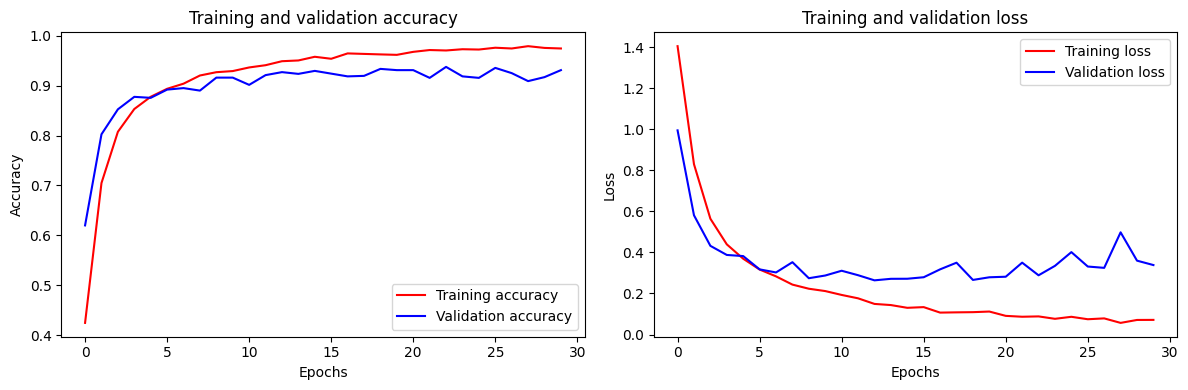

In [11]:
from packages.model import plot_training_history


# Plot the training history
plot_training_history(history)

### Evaluate the model performance

Run the model on the test set and check the model's performance:

In [12]:
from packages.model import evaluate_model


# Evaluate the model using the test dataset
evaluate_model(model, test_mel_spec_ds)

Test accuracy:      91%
Test loss:          0.30173930525779724
Precision:          0.9136525049083711
Recall:             0.9129601226993865
F1-score:           0.9128968716207465


## Confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


2024-10-12 18:21:06.048011: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


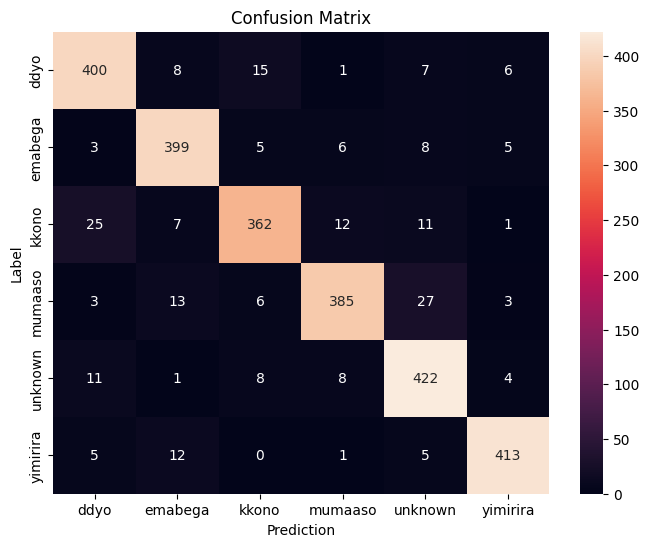

In [13]:
from packages.model import plot_confusion_matrix

y_pred = model.predict(test_mel_spec_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_mel_spec_ds.map(lambda s,lab: lab)), axis=0)
label_names_slice = ['ddyo', 'emabega', 'kkono', 'mumaaso', 'unknown', 'yimirira']


# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, label_names_slice)

## save the Keras model

In [14]:
KERAS_MODEL_PATH = "model/Model_spec_1.keras"

model.save(KERAS_MODEL_PATH)
print('Model has been successfully saved')

Model has been successfully saved


## Size of the model

In [17]:
from packages.model import get_model_size

# Get the size of the trained model
keras_model_size = get_model_size(KERAS_MODEL_PATH, 'MB')

File size: 1.356 Megabytes
